# Implementasi Proyek
11S4037 / Pemrosesan Bahasa Alami


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
import re 
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns 
from keras.models import Sequential
from keras.layers import *
from keras.preprocessing.sequence import pad_sequences
import gensim
import sys
import string
import logging
from sklearn.preprocessing import MinMaxScaler
import random
from sklearn.manifold import TSNE
from keras.callbacks import EarlyStopping
from sklearn.svm import LinearSVC
from sklearn import metrics 
plt.style.use('ggplot')


C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

Tahap selanjutnya adalah meload dataset, dimana dataset yang digunakan sudah dibagi menjadi 2 bagian yakni data train yang digunakan untuk melatih model dan data test yang digunakan untuk melakukan pengujian pada model

In [2]:
#LOAD DATASET
data_train = pd.read_csv('F:/Catatan Materi/Semester 7/TA 1/Data_set/Dataset IEEE/dataset/fake news detection(FakeNewsNet)/fnn_train.csv')
data_test = pd.read_csv('F:/Catatan Materi/Semester 7/TA 1/Data_set/Dataset IEEE/dataset/fake news detection(FakeNewsNet)/fnn_test.csv')
datas = pd.read_csv('F:/Catatan Materi/Semester 7/TA 1/Data_set/Dataset IEEE/dataset/fake news detection(FakeNewsNet)/fnn_train.csv')


Hal ini perlu dilakukan untuk melihat keadaan data seperti atribut apa saja yang terdapat pada data. Syntax yang digunakan adalah data_test.head() atau data_train.head(), agar tidak memakai banyak memori jika dibandingkan menampilkan keseluruhan data. Jadi dengan syntax tersebut, data yang ditampilkan hanyalah 5 data pertama

In [3]:
#Menampilkan beberapa data pertama pada data train
data_train.head()


,id,date,speaker,statement,sources,paragraph_based_content,fullText_based_content,label_fnn
0,3106,2011-01-25T06:00:00-05:00,Joe Wilkinson,A national organization says Georgia has one o...,['http://www.ajc.com/news/georgia-politics-ele...,['A coalition of government watchdog groups la...,A coalition of government watchdog groups last...,fake
1,5655,2012-04-02T11:42:20-04:00,Rick Scott,"Says Barack Obama's health care law ""will be t...",['http://www.youtube.com/watch?v=TaC0mKApf9Q&f...,['As Supreme Court justices embarked on three ...,As Supreme Court justices embarked on three da...,fake
2,3506,2011-04-01T09:49:05-04:00,J.D. Alexander,Says the Southwest Florida Water Management Di...,['http://www.tampabay.com/news/politics/gubern...,"[""Here's a new one: The Senate budget committe...",Here's a new one: The Senate budget committee ...,fake
3,3450,2011-03-21T12:20:02-04:00,Paul Ryan,"""The Congressional Budget Office has this econ...",['http://www.cnn.com/2011/POLITICS/03/17/gop.b...,"['Recently, House Budget chairman Paul Ryan, R...","Recently, House Budget chairman Paul Ryan, R-W...",real
4,4776,2011-11-13T07:30:00-05:00,Rodney Frelinghuysen,"Says the Treasury Department ""says 41 percent ...",['http://frelinghuysen.house.gov/index.cfm?sec...,['The millionaires’ tax proposal made its late...,The millionaires’ tax proposal made its latest...,fake


In [4]:
#Menampilkan beberapa data pertama pada data test
data_test.head()

,id,date,speaker,statement,sources,paragraph_based_content,fullText_based_content,label_fnn
0,1678,2010-04-11T16:37:40-04:00,Jon Kyl,"""President Obama himself attempted to filibust...",['http://abcnews.go.com/ThisWeek/video/supreme...,['U.S. Supreme Court Justice John Paul Stevens...,U.S. Supreme Court Justice John Paul Stevens a...,real
1,1820,2010-05-23T18:11:09-04:00,Michael Steele,"In Hawaii, ""they don't have a history of throw...",['http://www.starbulletin.com/news/bulletin/94...,"[""On ABC's This Week, the chairmen of the Repu...","On ABC's This Week, the chairmen of the Republ...",real
2,1624,2010-03-26T10:24:21-04:00,John Boehner,"""Our national debt ... is on track to exceed t...",['http://www.desmoinesregister.com/article/201...,['Ever since Barack Obama became president and...,Ever since Barack Obama became president and b...,real
3,1576,2010-03-12T11:45:14-05:00,America's Health Insurance Plans,"""Health insurance companies' costs are only 4 ...","['http://www.youtube.com/watch?v=4O8CxZ1OD58',...","[""As the battle over health care reform approa...",As the battle over health care reform approach...,real
4,1770,2010-05-07T11:54:44-04:00,Michael Bloomberg,"""We can prevent terror suspects from boarding ...",['http://www.huffingtonpost.com/michael-bloomb...,['In the wake of a foiled car bomb attempt in ...,In the wake of a foiled car bomb attempt in Ti...,real


# Data Transformation

Data transformation digunakan untuk mentransformasikan isi dari atribut label berita yaitu : Fake menjadi 0 dan Real menjadi 1. Teknik tranformasi yang digunakan adalah encoding categorical value.

Tujuan dari tahapan ini adalah mengkonsistenkan semua label pada berita, untuk mengetahui sebaran berita fake maupun real.

In [5]:
#data transformation use encoding categorial Value
data_train.label_fnn.replace({"fake":0}, inplace= True)
data_train.label_fnn.replace({"real":1}, inplace= True)

data_test.label_fnn.replace({"fake":0}, inplace= True)
data_test.label_fnn.replace({"real":1}, inplace= True)

In [6]:
#Menampilkan beberapa data pertama pada data train yang labelnya sudah ditransformasi
data_train.head()

,id,date,speaker,statement,sources,paragraph_based_content,fullText_based_content,label_fnn
0,3106,2011-01-25T06:00:00-05:00,Joe Wilkinson,A national organization says Georgia has one o...,['http://www.ajc.com/news/georgia-politics-ele...,['A coalition of government watchdog groups la...,A coalition of government watchdog groups last...,0
1,5655,2012-04-02T11:42:20-04:00,Rick Scott,"Says Barack Obama's health care law ""will be t...",['http://www.youtube.com/watch?v=TaC0mKApf9Q&f...,['As Supreme Court justices embarked on three ...,As Supreme Court justices embarked on three da...,0
2,3506,2011-04-01T09:49:05-04:00,J.D. Alexander,Says the Southwest Florida Water Management Di...,['http://www.tampabay.com/news/politics/gubern...,"[""Here's a new one: The Senate budget committe...",Here's a new one: The Senate budget committee ...,0
3,3450,2011-03-21T12:20:02-04:00,Paul Ryan,"""The Congressional Budget Office has this econ...",['http://www.cnn.com/2011/POLITICS/03/17/gop.b...,"['Recently, House Budget chairman Paul Ryan, R...","Recently, House Budget chairman Paul Ryan, R-W...",1
4,4776,2011-11-13T07:30:00-05:00,Rodney Frelinghuysen,"Says the Treasury Department ""says 41 percent ...",['http://frelinghuysen.house.gov/index.cfm?sec...,['The millionaires’ tax proposal made its late...,The millionaires’ tax proposal made its latest...,0


Hasil dari tahapan tranformasi ini adalah label fnn yang sudah berubah sesuai dengan aturan transformasi yang telah didefenisikan sebelumnya.

In [7]:
#Menampilkan beberapa data pertama pada data test yang labelnya sudah ditransformasi
data_test.head()

,id,date,speaker,statement,sources,paragraph_based_content,fullText_based_content,label_fnn
0,1678,2010-04-11T16:37:40-04:00,Jon Kyl,"""President Obama himself attempted to filibust...",['http://abcnews.go.com/ThisWeek/video/supreme...,['U.S. Supreme Court Justice John Paul Stevens...,U.S. Supreme Court Justice John Paul Stevens a...,1
1,1820,2010-05-23T18:11:09-04:00,Michael Steele,"In Hawaii, ""they don't have a history of throw...",['http://www.starbulletin.com/news/bulletin/94...,"[""On ABC's This Week, the chairmen of the Repu...","On ABC's This Week, the chairmen of the Republ...",1
2,1624,2010-03-26T10:24:21-04:00,John Boehner,"""Our national debt ... is on track to exceed t...",['http://www.desmoinesregister.com/article/201...,['Ever since Barack Obama became president and...,Ever since Barack Obama became president and b...,1
3,1576,2010-03-12T11:45:14-05:00,America's Health Insurance Plans,"""Health insurance companies' costs are only 4 ...","['http://www.youtube.com/watch?v=4O8CxZ1OD58',...","[""As the battle over health care reform approa...",As the battle over health care reform approach...,1
4,1770,2010-05-07T11:54:44-04:00,Michael Bloomberg,"""We can prevent terror suspects from boarding ...",['http://www.huffingtonpost.com/michael-bloomb...,['In the wake of a foiled car bomb attempt in ...,In the wake of a foiled car bomb attempt in Ti...,1


# Visualisasi sebaran fake news and real news pada dataset

Text(0.5, 1.0, 'Distribution of Fake News and Real News')

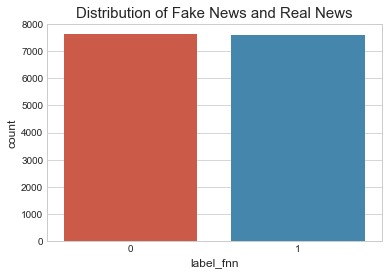

In [8]:
#visualisasi sebaran dataset fake dan true pada train dataset
label = data_train['label_fnn']
sns.set_style('whitegrid')
sns.countplot(label)
plt.title('Distribution of Fake News and Real News', size=15)

Hasil tahapan ini diketahui bahwa jumlah berita pada data train dengan label fake dan label real (distribusi berita) adalah seimbang.

Text(0.5, 1.0, 'Distribution of Fake News and Real News')

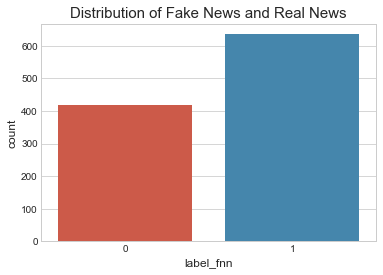

In [9]:
#visualisasi sebaran dataset fake dan true pada test dataset
label = data_test['label_fnn']
sns.set_style('whitegrid')
sns.countplot(label)
plt.title('Distribution of Fake News and Real News', size=15)

Hasil tahapan ini diketahui bahwa jumlah berita pada data test dengan label fake dan label real (distribusi berita) adalah seimbang.

In [10]:
data = pd.read_csv('F:/Catatan Materi/Semester 7/TA 1/Data_set/Dataset IEEE/dataset/fake news detection(FakeNewsNet)/fnn_train.csv')
data = data.drop(['id','date','speaker','sources','paragraph_based_content','fullText_based_content'], axis = 1)
data.label_fnn.replace({"fake":0}, inplace= True)
data.label_fnn.replace({"real":1}, inplace= True)

# Data Reduction

Data Reduction digunakan untuk mengurangi atribut yang tidak diperlukan dengan cara menghapusnya untuk dapat dilakukan pembangunan model. Atribut pada data terdiri dari id, date, speaker, sources, paragraph_based_content, fullText_based_content, statement dan label_fnn.

Syntax yang digunakan adalah drop.


In [11]:
#dimensional reduction atau pengurangan dimensi pada data train
data_train = data_train.drop(['id','date','speaker','sources','paragraph_based_content','fullText_based_content'], axis = 1)

In [12]:
#dimensional reduction atau pengurangan dimensi pada data test
data_test = data_test.drop(['id','date','speaker','sources','paragraph_based_content','fullText_based_content'], axis = 1)

Hasil dari data reduction adalah atribut statement dan label fnn.

In [13]:
data_train.head()

,statement,label_fnn
0,A national organization says Georgia has one o...,0
1,"Says Barack Obama's health care law ""will be t...",0
2,Says the Southwest Florida Water Management Di...,0
3,"""The Congressional Budget Office has this econ...",1
4,"Says the Treasury Department ""says 41 percent ...",0


In [14]:
data_test.head()

,statement,label_fnn
0,"""President Obama himself attempted to filibust...",1
1,"In Hawaii, ""they don't have a history of throw...",1
2,"""Our national debt ... is on track to exceed t...",1
3,"""Health insurance companies' costs are only 4 ...",1
4,"""We can prevent terror suspects from boarding ...",1


# Cleaning

In [15]:
#pada tahap ini dilakukan penghapusan baris yang terdapat nilai yang kosong
for col in data_train.columns:
    print(col, data_train[col].isnull().sum())

statement 0
label_fnn 0


In [16]:
for col in data_test.columns:
    print(col, data_test[col].isnull().sum())

statement 0
label_fnn 0


# Punctuation Removal

Punctuation Removal dilakukan untuk menghapus semua tanda baca pada atribut statement. Tujuan nya adalah untuk mendapatkan data yang lebih bersih dan siap diproses pada tahapan selanjutnya.


In [17]:
# punctuation removal
data_train["statement"] = data_train['statement'].str.replace(r'[^\w\s]+', '')
data_test["statement"] = data_test['statement'].str.replace(r'[^\w\s]+', '')

In [18]:
#menampilkan hasil punctuation removal pada data train
data_train.head()

,statement,label_fnn
0,A national organization says Georgia has one o...,0
1,Says Barack Obamas health care law will be the...,0
2,Says the Southwest Florida Water Management Di...,0
3,The Congressional Budget Office has this econo...,1
4,Says the Treasury Department says 41 percent o...,0


In [19]:
##menampilkan hasil punctuation removal pada data test
data_test.head()

,statement,label_fnn
0,President Obama himself attempted to filibuste...,1
1,In Hawaii they dont have a history of throwing...,1
2,Our national debt is on track to exceed the s...,1
3,Health insurance companies costs are only 4 pe...,1
4,We can prevent terror suspects from boarding a...,1


Hasil dari Punctuation removal berupa data tanpa tanda baca dan lebih mudah untuk ditokenisasi.

# Remove number

In [20]:
data_train["statement"] = data_train['statement'].str.replace('\d+', '')
data_test["statement"] = data_test['statement'].str.replace('\d+', '')

In [21]:
data_train.head()

,statement,label_fnn
0,A national organization says Georgia has one o...,0
1,Says Barack Obamas health care law will be the...,0
2,Says the Southwest Florida Water Management Di...,0
3,The Congressional Budget Office has this econo...,1
4,Says the Treasury Department says percent of ...,0


# Tokenization

Proses tokenisasi dilakukan untuk memecah setiap berita menjadi setiap token dan lebih mudah untuk di proses dalam tahapan stopword removal.

In [22]:
#tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import WhitespaceTokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Junpa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
#Tokenisasi
data_train['statement']= data_train['statement'].apply(nltk.tokenize.WhitespaceTokenizer().tokenize)
data_test['statement']= data_test['statement'].apply(nltk.tokenize.WhitespaceTokenizer().tokenize)


In [24]:
#menampilkan hasil tokenization pada data train
data_train.head()

,statement,label_fnn
0,"[A, national, organization, says, Georgia, has...",0
1,"[Says, Barack, Obamas, health, care, law, will...",0
2,"[Says, the, Southwest, Florida, Water, Managem...",0
3,"[The, Congressional, Budget, Office, has, this...",1
4,"[Says, the, Treasury, Department, says, percen...",0


Setiap berita pada atribut statement berubah menjadi token

In [25]:
#menampilkan hasil tokenization pada data train
data_test.head()

,statement,label_fnn
0,"[President, Obama, himself, attempted, to, fil...",1
1,"[In, Hawaii, they, dont, have, a, history, of,...",1
2,"[Our, national, debt, is, on, track, to, excee...",1
3,"[Health, insurance, companies, costs, are, onl...",1
4,"[We, can, prevent, terror, suspects, from, boa...",1


# Stopword Removal

In [26]:
#stopword removal
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Junpa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
#implementasi stopword removal
stop = stopwords.words('english')
data_train['statement'] = data_train['statement'].apply(lambda x: [item for item in x if item not in stop])
data_test['statement'] = data_test['statement'].apply(lambda x: [item for item in x if item not in stop])

In [28]:
#menampilkan data train setelah dilakukan stopword removal
data_train.head()

,statement,label_fnn
0,"[A, national, organization, says, Georgia, one...",0
1,"[Says, Barack, Obamas, health, care, law, bigg...",0
2,"[Says, Southwest, Florida, Water, Management, ...",0
3,"[The, Congressional, Budget, Office, economic,...",1
4,"[Says, Treasury, Department, says, percent, bu...",0


In [29]:
#menampilkan data test setelah dilakukan stopword removal
data_test.head()

,statement,label_fnn
0,"[President, Obama, attempted, filibuster, Just...",1
1,"[In, Hawaii, dont, history, throwing, incumben...",1
2,"[Our, national, debt, track, exceed, size, ent...",1
3,"[Health, insurance, companies, costs, percent,...",1
4,"[We, prevent, terror, suspects, boarding, airp...",1


# Lematization

In [30]:
#Lematisasi
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
def lema_words(text):
  wnl=WordNetLemmatizer()
  return[wnl.lemmatize(w) for w in text]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Junpa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
#implementasi lematisasi
lemmatizer = WordNetLemmatizer()

data_train['statement'] = data_train['statement'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
data_test['statement'] = data_test['statement'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [32]:
#menampilkan data train setelah dilakukan lemmatisasi
data_train.head()

,statement,label_fnn
0,"[A, national, organization, say, Georgia, one,...",0
1,"[Says, Barack, Obamas, health, care, law, bigg...",0
2,"[Says, Southwest, Florida, Water, Management, ...",0
3,"[The, Congressional, Budget, Office, economic,...",1
4,"[Says, Treasury, Department, say, percent, bus...",0


In [33]:
#menampilkan data test setelah dilakukan lemmatisasi
data_test.head()

,statement,label_fnn
0,"[President, Obama, attempted, filibuster, Just...",1
1,"[In, Hawaii, dont, history, throwing, incumben...",1
2,"[Our, national, debt, track, exceed, size, ent...",1
3,"[Health, insurance, company, cost, percent, he...",1
4,"[We, prevent, terror, suspect, boarding, airpl...",1


In [34]:
print(len(data_test))

1054


# WORD2VEC

In [35]:
w2v_model = gensim.models.Word2Vec(data_train['statement'], size=100, sg=0, min_count=1, window=5, iter =10)
w2v_weights = w2v_model.wv.vectors
vocab_size, embedding_size = w2v_weights.shape

print("Vocabulary Size: {} - Embedding Dim: {}".format(vocab_size, embedding_size))
print(w2v_model.wv.most_similar('size', topn=3))

# definisikan fungsi untuk membuat averaged sentence vector dari list of sentence tokens
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            # jumlahkan
            vec += w2v_model.wv.__getitem__(word).reshape((1, size))
            count += 1.
        except KeyError: 
            
            continue
    # bagikan dengan total word dalam sentence
    if count != 0:
        vec /= count
    return vec

# konversi data_train['statement'] dan data_test['statement'] ke dalam list of vectors
X_train_w2v = np.concatenate([buildWordVector(z, 100) for z in map(lambda x: x, data_train['statement'])])

#fungsi untuk mengubah setiap kalimat menjadi token
def word_token(word):
    try:
        return w2v_model.wv.vocab[word].index

    except KeyError:
        return 0
    
#fungsi untuk mengubah kata yang telah ditokenisasi menjadi kalimat biasa
def token_word(token):
    return w2v_model.wv.index2word[token]

Vocabulary Size: 15896 - Embedding Dim: 100
[('larger', 0.9847996234893799), ('exceeds', 0.9845266342163086), ('consumes', 0.983977735042572)]


In [36]:
#jumlah sampel kata
#samples = 500
#randoms = random.sample(range(vocab_size), samples)
#random_words = [token_word(i) for i in randoms]

#word_vecs = np.array([w2v_model[w] for w in random_words])

#tsne = TSNE()
#tsne_e = tsne.fit_transform(word_vecs)
# Plot t-SNE result
#plt.figure(figsize=(32, 32))
#plt.scatter(tsne_e[:, 0], tsne_e[:, 1], marker='o', c=range(len(random_words)), cmap=plt.get_cmap('Spectral'))

#for label, x, y, in zip(random_words, tsne_e[:, 0], tsne_e[:, 1]):
    #plt.annotate(label,
                 #xy=(x, y), xytext=(0, 15),
                # textcoords='offset points', ha='right', va='bottom',
                # bbox=dict(boxstyle='round, pad=0.2', fc='yellow', alpha=0.1))

# Untuk Model 2

In [37]:
MAX_NB_WORDS = vocab_size
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

#perhatikan bahwa pada model kedua dilakukan tokenisasi pada kalimat/judul dengan ketentuan di bawah ini
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data_train['statement'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 14077 unique tokens.


In [38]:
#mengubah bentuk kelimat menjadi tokenisasi, dimana atribut yang digunakan yaitu statement
X = tokenizer.texts_to_sequences(data_train['statement'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

#mengubah label dan ditampung oleh variabel Y
Y = pd.get_dummies(data_train['label_fnn']).values

In [39]:
#mensplit data menjadi train dan test 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(13690, 250) (13690, 2)
(1522, 250) (1522, 2)


In [40]:
#data test
tokenizer2 = Tokenizer(num_words=250, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer2.fit_on_texts(data_test['statement'].values)

In [41]:
x = tokenizer2.texts_to_sequences(data_test['statement'].values)
x= pad_sequences(x, maxlen=MAX_SEQUENCE_LENGTH)
y = pd.get_dummies(data_test['label_fnn']).values

In [42]:
test_X_train, test_X_test, test_Y_train, test_Y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
print(test_X_train.shape,test_Y_train.shape)
print(test_X_test.shape,test_Y_test.shape)

(843, 250) (843, 2)
(211, 250) (211, 2)


# Model 1

In [43]:
#class kode di bawah digunakan untuk model pertama sebagai tokisasi. 
#dimana data yang diambil dari dua atribut yang berbeda dan ditampung oleh dua variabel yang berbeda

DROP_THRESHOLD = 1000

class SequenceIterator:
    def __init__(self, dataset, drop_threshold, seq_length):
        self.dataset = dataset

        self.translator = str.maketrans('', '', string.punctuation + '–')
        self.categories, self.ccount = np.unique(dataset.label_fnn, return_counts=True)
        
        self.seq_length = seq_length
        

        self.drop_categos = []
        for cat, count in zip(self.categories, self.ccount):
            if count < drop_threshold:
                self.drop_categos.append(cat)
        
        # menamai label atau categori
        self.categories = np.setdiff1d(self.categories, self.drop_categos)
       
    def __iter__(self):
        for news, cat in zip(self.dataset.iloc[:, 0], self.dataset.iloc[:, 1]):
            if cat in self.drop_categos:
                continue
            
            # Membuat semua kata menjadi huruf kecil
            news = news.lower()
            
            # melakukan punctuation
            news = news.translate(self.translator)

            words = np.array([word_token(w) for w in news.split(' ')[:self.seq_length] if w != ''])
               
            yield (words, cat)

sequences = SequenceIterator(data, DROP_THRESHOLD, MAX_SEQUENCE_LENGTH)


cat_dict = {k: v for k, v in zip(sequences.categories, range(len(sequences.categories)))}

set_x = []
set_y = []
for w, c in sequences:
    set_x.append(w)
    set_y.append(cat_dict[c])
    

set_x = pad_sequences(set_x, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', value=0)
set_y = np.array(set_y)



In [44]:
print(len(set_y), len(set_x))

15212 15212


# TEST BILSTM

In [45]:
#presentasi jumlah data yang akan digunakan untuk validasi dan tes

VALID_PER = 0.2 
total_samples = set_x.shape[0]
n_val = int(VALID_PER * total_samples)
n_train = total_samples - n_val

random_i = random.sample(range(total_samples), total_samples)
train_x = set_x[random_i[:n_train]]
train_y = set_y[random_i[:n_train]]
val_x = set_x[random_i[n_train:n_train+n_val]]
val_y = set_y[random_i[n_train:n_train+n_val]]

print("Train Shapes - X: {} - Y: {}".format(train_x.shape, train_y.shape))
print("Val Shapes - X: {} - Y: {}".format(val_x.shape, val_y.shape))


categories, ccount = np.unique(train_y, return_counts=True)
#jumlah label yang digunakan yaitu 1 dan 0 (berjumlah 2)
n_categories = len(categories)

Train Shapes - X: (12170, 250) - Y: (12170,)
Val Shapes - X: (3042, 250) - Y: (3042,)


# Model 1

In [46]:
#input_dim merupakan jumlah dari vocab yang ada pada dataset
#output_dim menggunakan ukuran yang sama dengan weights.
#weights merupakan bobot yang akan digunakan pada lstm dalam mengklasifikasi
#aktivasi softmax digunakan sebagai fungsi aktivasi pada lapisan keluaran model jaringan saraf 
#tiruan yang memprediksi distribusi probabilitas multinomial

model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_size,
                    weights=[w2v_weights],
                    input_length=MAX_SEQUENCE_LENGTH,
                    mask_zero=True,
                    trainable=False))

model.add(Bidirectional(LSTM(100)))
model.add(Dense(n_categories, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 100)          1589600   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dense (Dense)                (None, 2)                 402       
Total params: 1,750,802
Trainable params: 161,202
Non-trainable params: 1,589,600
_________________________________________________________________
None


In [47]:
epochs = 5
batch_size = 64
historys = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size,
                    validation_data=(val_x, val_y), verbose=1)

Epoch 1/5
191/191 [==============================] - 193s 1s/step - loss: 0.6716 - accuracy: 0.5939 - val_loss: 0.6622 - val_accuracy: 0.6045
Epoch 2/5
191/191 [==============================] - 184s 962ms/step - loss: 0.6669 - accuracy: 0.5977 - val_loss: 0.6606 - val_accuracy: 0.6082
Epoch 3/5
191/191 [==============================] - 185s 967ms/step - loss: 0.6638 - accuracy: 0.5985 - val_loss: 0.6560 - val_accuracy: 0.6095
Epoch 4/5
191/191 [==============================] - 189s 990ms/step - loss: 0.6601 - accuracy: 0.6052 - val_loss: 0.6567 - val_accuracy: 0.6072
Epoch 5/5
191/191 [==============================] - 227s 1s/step - loss: 0.6569 - accuracy: 0.6109 - val_loss: 0.6554 - val_accuracy: 0.6121


In [48]:
accr = model.evaluate(val_x,val_y)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

96/96 [==============================] - 9s 95ms/step - loss: 0.6554 - accuracy: 0.6121
Test set
  Loss: 0.655
  Accuracy: 0.612


# Model 2

In [49]:
model2 = Sequential()
model2.add(Embedding(MAX_NB_WORDS,
                    EMBEDDING_DIM,
                    weights=[w2v_weights],
                    input_length=X.shape[1]
                    ))

model2.add(SpatialDropout1D(0.2))
model2.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model2.add(Dense(n_categories, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          1589600   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 250, 100)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 402       
Total params: 1,750,802
Trainable params: 1,750,802
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
epochs = 5
batch_size = 64
train =model2.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/5
193/193 [==============================] - 480s 2s/step - loss: 0.6921 - accuracy: 0.5392 - val_loss: 0.6805 - val_accuracy: 0.5551
Epoch 2/5
193/193 [==============================] - 475s 2s/step - loss: 0.6688 - accuracy: 0.5841 - val_loss: 0.6690 - val_accuracy: 0.5800
Epoch 3/5
193/193 [==============================] - 482s 2s/step - loss: 0.5969 - accuracy: 0.6792 - val_loss: 0.7111 - val_accuracy: 0.5939
Epoch 4/5
193/193 [==============================] - 504s 3s/step - loss: 0.4327 - accuracy: 0.7964 - val_loss: 0.8227 - val_accuracy: 0.5822
Epoch 5/5
193/193 [==============================] - 442s 2s/step - loss: 0.3194 - accuracy: 0.8507 - val_loss: 1.0527 - val_accuracy: 0.5720


In [51]:
test =model2.fit(test_X_train, test_Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
12/12 [==============================] - 26s 2s/step - loss: 0.7028 - accuracy: 0.5607 - val_loss: 0.5860 - val_accuracy: 0.7765
Epoch 2/5
12/12 [==============================] - 25s 2s/step - loss: 0.6169 - accuracy: 0.6715 - val_loss: 0.5447 - val_accuracy: 0.7765
Epoch 3/5
12/12 [==============================] - 26s 2s/step - loss: 0.5805 - accuracy: 0.6873 - val_loss: 0.5376 - val_accuracy: 0.7294
Epoch 4/5
12/12 [==============================] - 26s 2s/step - loss: 0.5556 - accuracy: 0.7137 - val_loss: 0.5243 - val_accuracy: 0.7412
Epoch 5/5
12/12 [==============================] - 25s 2s/step - loss: 0.5391 - accuracy: 0.7335 - val_loss: 0.5015 - val_accuracy: 0.7765


In [52]:
accuras = model2.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accuras[0],accuras[1]))

48/48 [==============================] - 10s 205ms/step - loss: 1.1535 - accuracy: 0.5795
Test set
  Loss: 1.153
  Accuracy: 0.580


In [53]:
dels = LinearSVC()
C_train, C_test, K_train, K_test = train_test_split(set_x, set_y, test_size= 0.33, random_state= 0)
dels.fit(C_train, K_train)
K_pred= dels.predict(C_test)
print(metrics.classification_report(K_test, K_pred, target_names = datas['label_fnn'].unique()))

              precision    recall  f1-score   support

        fake       0.50      0.65      0.57      2533
        real       0.49      0.34      0.40      2487

    accuracy                           0.50      5020
   macro avg       0.50      0.50      0.49      5020
weighted avg       0.50      0.50      0.49      5020



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
